# UNSW-NB15: Exploratory Data Analysis

Performing EDA on the dataset in this notebook.

## Loading data from disk

In [13]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
train = pd.read_csv('cleaned_train.csv')

In [16]:
train.shape

(175341, 45)

In [17]:
# Dividing the train data into attack and non-attack category
normal = train[train['label']==0]
anomaly = train[train['label']==1]

### Helper functions

In [18]:
def multi_corr(col1, col2="label", df=train):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

def corr(col1, col2="label", df=train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

## Correlation
Getting correlation values for all the features.

Plot heatmap of correaltion for better visualization

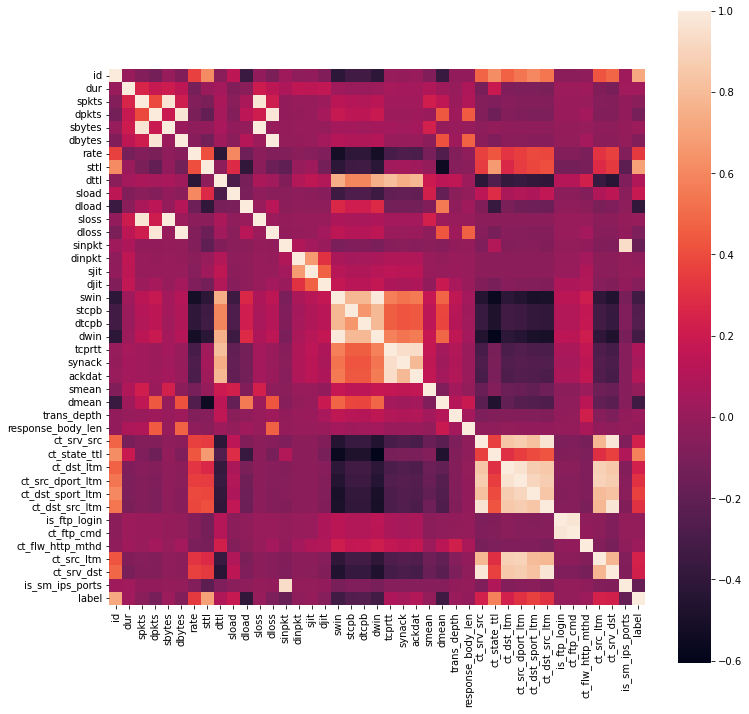

In [20]:
# Plotting the correlation matrix of the dataset
# Refer: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

method = "pearson"
# correlation matrix
corr_mat = train.corr(method=method)

plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()

In [21]:
# Getting and printing high correlated features
limit = 0.9

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")


spkts                sbytes               0.9637905453658627
spkts                sloss                0.9710686917738107
dpkts                dbytes               0.9719070079919281
dpkts                dloss                0.9786363765709863
sbytes               sloss                0.9961094729148002
dbytes               dloss                0.9965035947623478
sinpkt               is_sm_ips_ports      0.9413189007355157
swin                 dwin                 0.9901399299415929
tcprtt               synack               0.9494676611067603
tcprtt               ackdat               0.9417603738127356
ct_srv_src           ct_dst_src_ltm       0.9671378245460094
ct_srv_src           ct_srv_dst           0.9803230099911133
ct_dst_ltm           ct_src_dport_ltm     0.9620518416459877
ct_src_dport_ltm     ct_dst_sport_ltm     0.9067931558835277
ct_dst_src_ltm       ct_srv_dst           0.9723704538697349
is_ftp_login         ct_ftp_cmd           0.9729150411024579


Most correlated features are:
* sbytes, sloss
* dpkts, dbytes, dloss
* sttl, ct_state_ttl, label
* swin, dwin
* stime, dtime
* tcprtt, synack, ackdat
* ct_srv_src, ct_dst_src_ltm, ct_srv_dst
* ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm



### Countplots for data features

Helper functions

In [25]:
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()
# Plotting pdf of numerical columns
# Refer: https://www.kaggle.com/khairulislam/unsw-nb15-eda

def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    """
    This function plots pdf of the given feature on attack and non-attck data
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()

def reduce_column(s, to_keep):
    """
    This function reduce categorical values of a given feature to values provided in to_keep list
    and make every other value "others"
    """
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

#### Attack Category
The name of each attack category. In this
data set, there are total nine categories of attack and normal is non-attack.

In our data most occured attack data categories are "Generic", "Exploits", Fuzzers", "DoS" and "Reconnaissance"

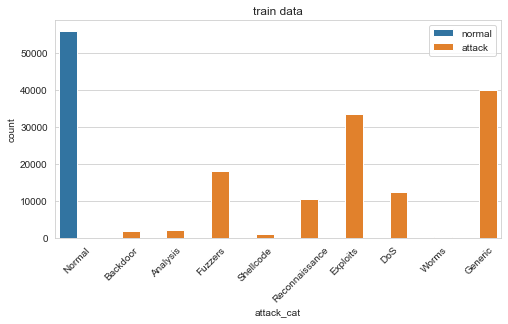

In [28]:
col_countplot('attack_cat')